In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='Count'>

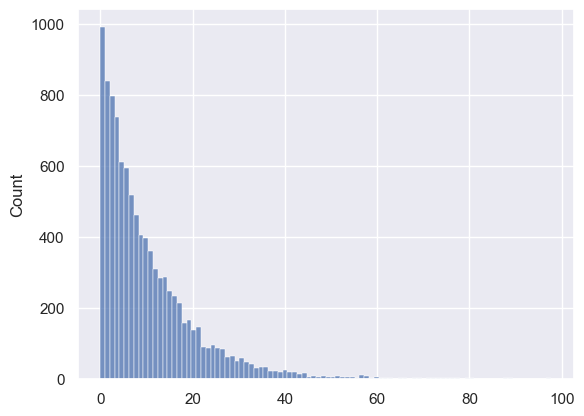

In [56]:
#Vamos a crear una distribución de datos sesgada
sns.set_theme()

np.random.seed(20)
x = np.random.exponential(scale=10 , size=10000)
#Dibujar el histograma
sns.histplot(x)

<Axes: ylabel='Count'>

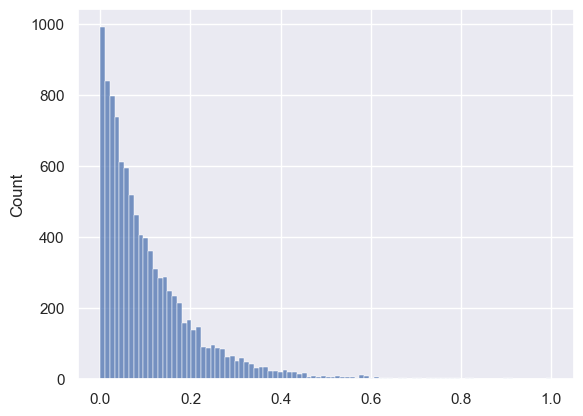

In [57]:
#Ahora hagamos el escalamiento entre 0 y 1 de forma manual
x_s = (x-x.min())/(x.max()-x.min())
#Y dibujar el histograma
sns.histplot(x_s)


Vemos que el sesgo sigue existiendo. Es decir minmaxscaler no cambia la distribución de los datos, pero ahora están en una escala de 0 a 1 por lo que,
se comprime la distribución de estos en un rango más pequeño, entonces se sigue desaprovechando todos los datos que se encuentran entre 0.6 y 1.
Por lo que no combiene usar minmaxsclaler con datos sesgados

<Axes: ylabel='Count'>

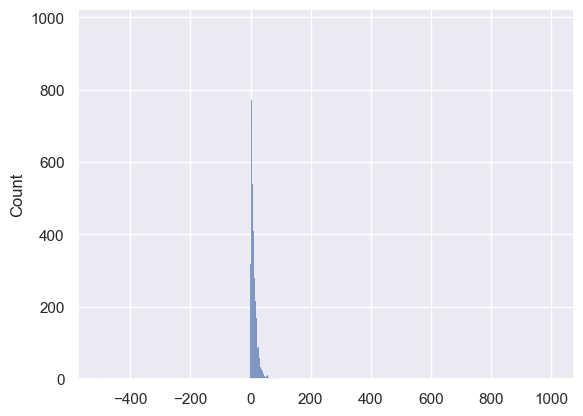

In [58]:
#Ahora agregamos dos valores extremos por ejemplo 500 y 1000
x = np.append(x,[-500,1000])
sns.histplot(x)

<Axes: ylabel='Count'>

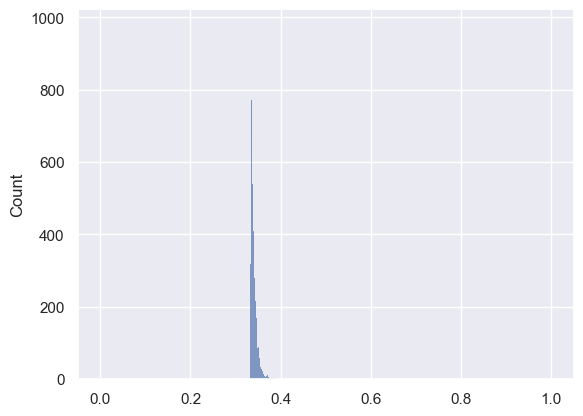

In [59]:
#Ahora hagamos el escalamiento entre 0 y 1 de forma manual
x_s = (x-x.min())/(x.max()-x.min())
#Y dibujar el histograma
sns.histplot(x_s)

De nuevo la distribución no cambia, con valores extremos el escalamiento tiende a comprimir la distribución original

¿Entonces cuándo usar minmaxscaler?
Cuando tenemos claro el rango de valores a la salida del escalamiento
Cuando la distribución de los datos NO tiene demasiado sesgo
Cuando los datos NO contienen outliers

In [60]:
#Lectura
data = pd.read_csv("datasets\housing.csv")

In [61]:
print(data.shape)
data.head()
data['longitude'] = data['longitude'].abs()

(20640, 10)


In [62]:
#Seleccionamos las columnas que nos interesan
columnas_interes= ['housing_median_age', 'population', 'total_bedrooms', 'longitude', 'latitude','median_house_value']
datanew = data[columnas_interes]
print(datanew.shape)
datanew.head(20)

(20640, 6)


,housing_median_age,population,total_bedrooms,longitude,latitude,median_house_value
0,41.0,322.0,129.0,122.23,37.88,452600.0
1,21.0,2401.0,1106.0,122.22,37.86,358500.0
2,52.0,496.0,190.0,122.24,37.85,352100.0
3,52.0,558.0,235.0,122.25,37.85,341300.0
4,52.0,565.0,280.0,122.25,37.85,342200.0
5,52.0,413.0,213.0,122.25,37.85,269700.0
6,52.0,1094.0,489.0,122.25,37.84,299200.0
7,52.0,1157.0,687.0,122.25,37.84,241400.0
8,42.0,1206.0,665.0,122.26,37.84,226700.0
9,52.0,1551.0,707.0,122.25,37.84,261100.0


In [63]:
#Observamos los rangos de valores de cada variable
datanew.describe().loc[['min','max']]

,housing_median_age,population,total_bedrooms,longitude,latitude,median_house_value
min,1.0,3.0,1.0,114.31,32.54,14999.0
max,52.0,35682.0,6445.0,124.35,41.95,500001.0


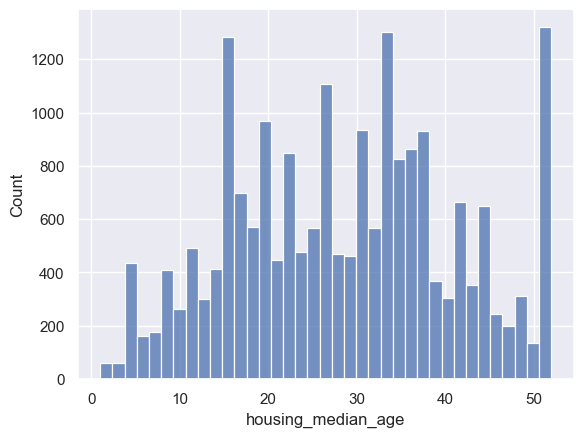

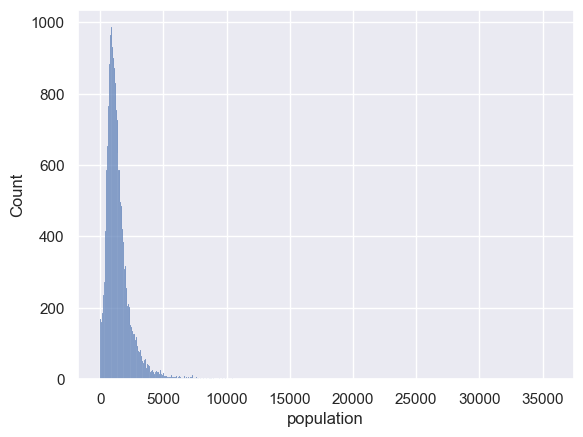

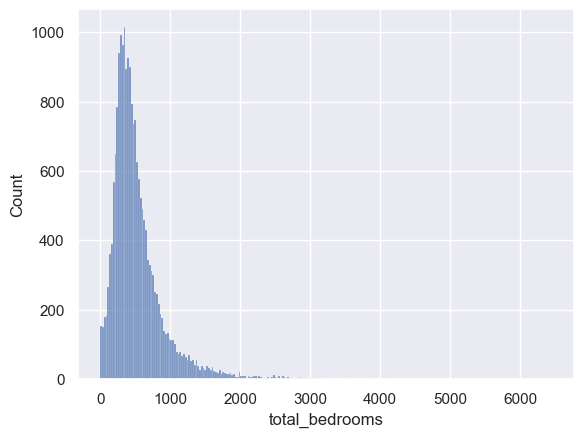

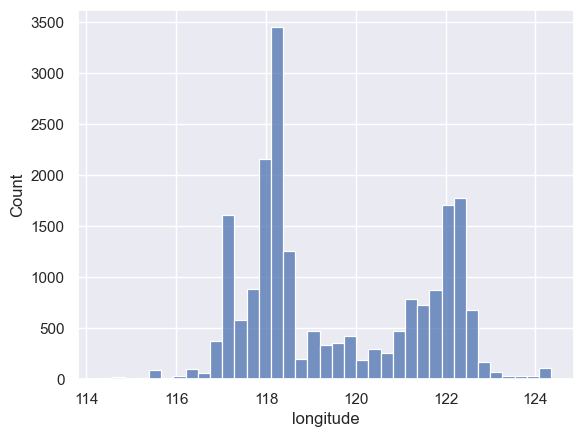

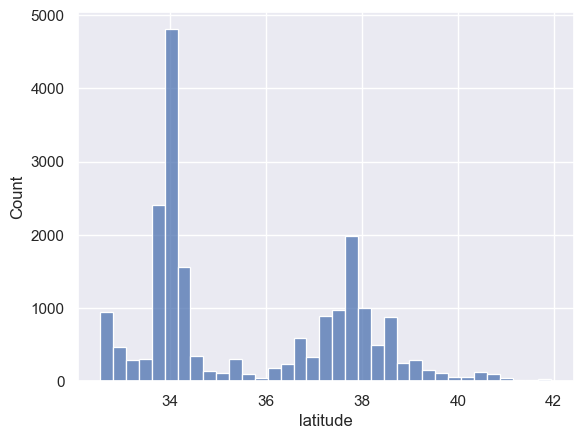

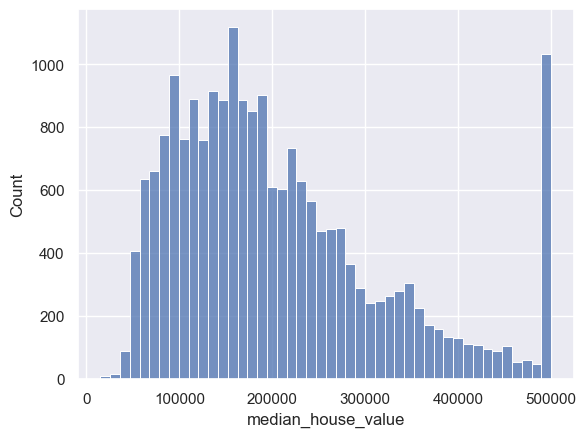

In [64]:
#Mostramos una grafica para ver si hay datos extremos
import matplotlib.pyplot as plt

#Dibujar el histograma de cada columna
for col in datanew.columns:
    plt.figure()
    sns.histplot(datanew[col])
    
    

In [65]:
print(f"Tamaño del set antes de eliminar registros de habitantes:{datanew.shape}")
datanew = datanew[datanew['population']<= 4000]
print(f"Tamaño del set despues de eliminar registros de habitantes:{datanew.shape}")

Tamaño del set antes de eliminar registros de habitantes:(20640, 6)
Tamaño del set despues de eliminar registros de habitantes:(20054, 6)


In [66]:
print(f"Tamaño del set antes de eliminar registros de habitaciones:{datanew.shape}")
datanew = datanew[datanew['total_bedrooms']<= 1500]
print(f"Tamaño del set despues de eliminar registros de habitaciones:{datanew.shape}")


Tamaño del set antes de eliminar registros de habitaciones:(20054, 6)
Tamaño del set despues de eliminar registros de habitaciones:(19626, 6)


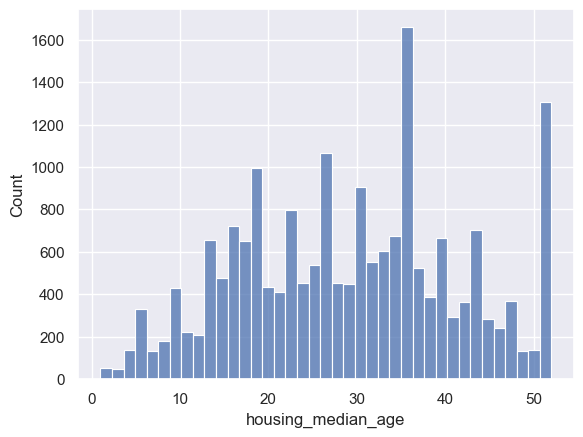

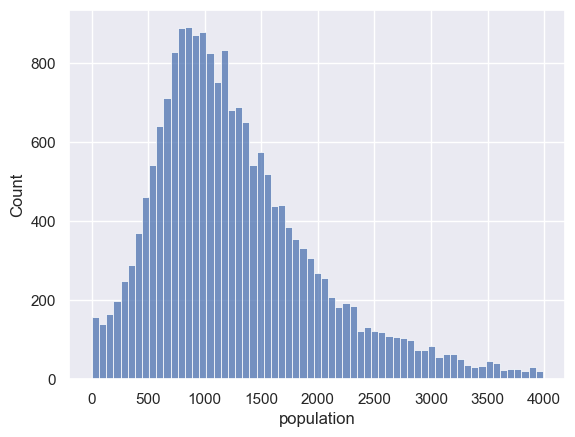

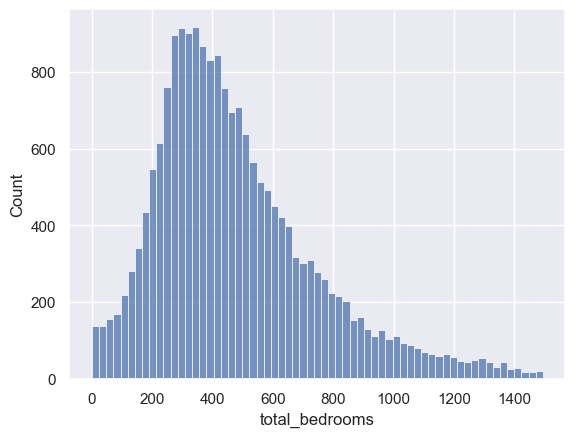

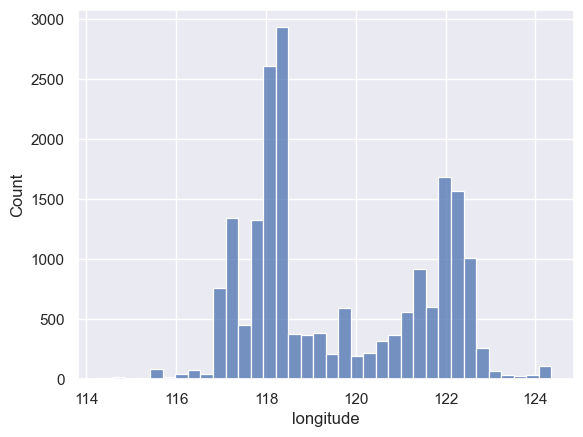

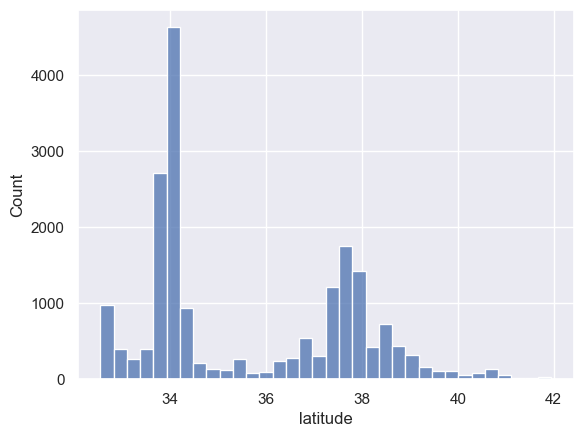

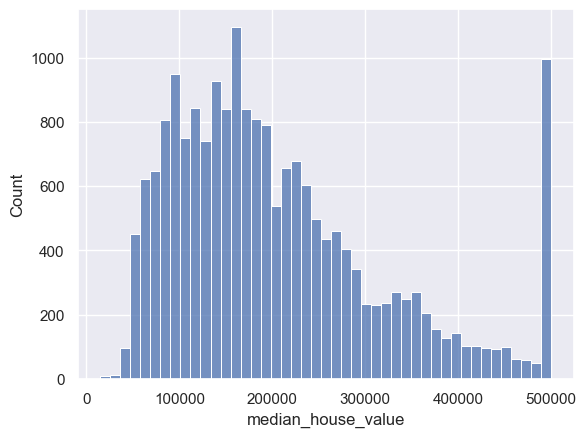

In [67]:
#Mostramos la gráfica despues de eliminar registros
for col in datanew.columns:
    plt.figure()
    sns.histplot(datanew[col])

In [68]:
#Crear arreglos de entrada (x, y)
x = datanew.iloc[:,0:5].to_numpy()

y = datanew.iloc[:,-1].to_numpy()
print(x)

[[  41.    322.    129.    122.23   37.88]
 [  21.   2401.   1106.    122.22   37.86]
 [  52.    496.    190.    122.24   37.85]
 ...
 [  17.   1007.    485.    121.22   39.43]
 [  18.    741.    409.    121.32   39.43]
 [  16.   1387.    616.    121.24   39.37]]


In [69]:
from sklearn.model_selection import train_test_split
#Realizamos la partición en entrenamiento (80%), validación (10%) y prueba(10%)
x_tr, x_resto, y_tr, y_resto = train_test_split(x, y, test_size=0.2, random_state=23)

x_vl, x_test, y_vl, y_test = train_test_split(x_resto, y_resto, test_size=0.5, random_state=23) 

print(x_tr.shape,y_tr.shape)
print(x_vl.shape, y_vl.shape)
print(x_test.shape,y_test.shape)

(15700, 5) (15700,)
(1963, 5) (1963,)
(1963, 5) (1963,)


In [70]:
from sklearn.preprocessing import MinMaxScaler

#Minmaxscaler, si no declaro el feature range seria entre 0 y 1 pero aqui le doy el rango porque la longitud es negativa
x_scaler = MinMaxScaler()

#Fit_transform para cálcular máximos y minimos y escalar el set de entrenamiento
x_tr_s = x_scaler.fit_transform(x_tr)

#Algunas características del escalador
print('Características del escalador ajustado:')
print(x_scaler.data_min_, x_scaler.data_max_)

#Resultado
print('Resultado del escalamiento sobre "x_tr":')
print(f' Mínimos: {x_tr_s.min(axis=0)}')
print(f' Máximos: {x_tr_s.max(axis=0)}')


Características del escalador ajustado:
[  1.     3.     1.   114.31  32.54] [  52.   3985.   1491.    124.35   41.95]
Resultado del escalamiento sobre "x_tr":
 Mínimos: [0. 0. 0. 0. 0.]
 Máximos: [1. 1. 1. 1. 1.]


In [71]:
#Ahora usamos otro escalador para el target
#y_scaler = MinMaxScaler()
#y_tr_s = y_scaler.fit_transform(y_tr)

#Algunas características del escalador
#print('Características del escalador ajustado:')
#print(y_scaler.data_min_, y_scaler.data_max_)

#Resultado
#print('Resultado del escalamiento sobre "x_tr":')
#print(f' Mínimos: {y_tr_s.min(axis=0)}')
#print(f' Máximos: {y_tr_s.max(axis=0)}')

#Este codigo lanza un error porque espera un array2d y este es 1d

In [72]:
print(y_tr.shape)
y_tr = y_tr.reshape(-1,1)
print(y_tr.shape)

(15700,)
(15700, 1)


In [73]:
#Ahora si podemos realizar el escalamiento
y_scaler = MinMaxScaler()
y_tr_s= y_scaler.fit_transform(y_tr)

#Algunas características del escalador
print('Características del escalador ajustado:')
print(y_scaler.data_min_, y_scaler.data_max_)

#Resultado
print('Resultado del escalamiento sobre "x_tr":')
print(f' Mínimos: {y_tr_s.min(axis=0)}')
print(f' Máximos: {y_tr_s.max(axis=0)}')

Características del escalador ajustado:
[14999.] [500001.]
Resultado del escalamiento sobre "x_tr":
 Mínimos: [0.]
 Máximos: [1.]


In [74]:
#Ahora escalamos los set de validacion y prueba pero con transform porque usa de referencia los valores escalados del set de entrenamiento
x_vl_s = x_scaler.transform(x_vl)
x_ts_s = x_scaler.transform(x_test)

print('Set de validacion:')
print(f'{x_vl_s.min(axis=0)},{x_vl_s.max(axis=0)}')
print('Set de prueba')
print(f'{x_ts_s.min(axis=0)},{x_ts_s.max(axis=0)}')


Set de validacion:
[0.01960784 0.00075339 0.00067114 0.02390438 0.0021254 ],[1.         1.00075339 0.99060403 0.98804781 0.98618491]
Set de prueba
[0.         0.00200904 0.00134228 0.02589641 0.0021254 ],[1.         0.99422401 1.00201342 0.99203187 0.9968119 ]


In [75]:
#Ahora construimos el modelo de regresion lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Entrenamos el modelo
model.fit(x_tr_s, y_tr_s)



LinearRegression()

In [76]:
#Hacemos las predicciones con los sets de validacion y prueba, pero escalados

y_vl_pred_s = model.predict(x_vl_s)
y_ts_pred_s = model.predict(x_ts_s)

print(y_vl_pred_s.min(), y_vl_pred_s.max())
print(y_ts_pred_s.min(), y_ts_pred_s.max())



-0.3515145991362232 0.811874603859908
-0.24013512476765764 0.7620373759435111


In [ ]:
# Limitar predicciones al rango [0, 1]
y_vl_pred_s_clipped = np.clip(y_vl_pred_s, 0,1)
y_ts_pred_s_clipped = np.clip(y_ts_pred_s, 0,1)

#Debemos usar inverse_transform para realizar el escalamiento inverso

y_vl_pred = y_scaler.inverse_transform(y_vl_pred_s_clipped)
y_ts_pred = y_scaler.inverse_transform(y_ts_pred_s_clipped)

print(y_vl_pred.min(), y_vl_pred.max())
print(y_ts_pred.min(), y_ts_pred.max())

#¡Este paso no es necesario si se hace un modelo de clasificación!

14999.0 408759.80662126304
14999.0 384588.65140735474
